## Test Notebook for sklearn and the pyspch.stats.Densities module that is built on top of it 

08/02/2022: tested with v0.6      
19/04/2022: v0.6.5   
27/09/2022: v0.7   
status: this file needs to be cleaned up and test should be on Densities module and as little as possible on new definitions in this file


In [1]:
#!pip install git+https://github.com/compi1234/pyspch.git
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
import matplotlib.pyplot as plt
import seaborn as sns
cmap = sns.light_palette("caramel",50,input="xkcd")
import pandas as pd

from IPython.display import display, HTML, clear_output
from scipy.special import logsumexp
from scipy.stats import norm

from pyspch.core.sequence_data import make_seq1, make_seq1d
from pyspch.stats import probdist
import pyspch.display as Spd
import pyspch.core as Spch

In [3]:
# A wrapper class around CategoricalNB
# The logprob equivalent to Densities.Discrete
class Dist_Discr(CategoricalNB):
    """
    feature_log_prob_ : list of arrays of shape (n_features,)
        Each holds an array of shape (n_classes, n_categories of respective feature) for each feature.
    """
    def print_model(self,per_class=False):
        if per_class:
            n_classes = len(self.classes_)
            for i in range(n_classes): self.print_class(i)
        else:
            n_features = len(self.feature_log_prob_)
            for i in range(n_features): self.print_feature(i)
            
    def print_feature(self,feat_id):            
        print(" ++ Feature(%d) ++ "%feat_id)
        proba = np.exp(self.feature_log_prob_[feat_id])
        print(proba)

    def predict_log_prob(self,X):
        jll = np.zeros((X.shape[0], self.class_count_.shape[0]))
        for i in range(self.n_features_in_):
            indices = X[:, i]
            jll += self.feature_log_prob_[i][:, indices].T
        return jll
    
    def predict_prob(self,X):
        return( np.exp( self.predict_log_prob(X)))
    
    def get_class_log_proba(self,class_id):
        """ get probs per class as n_feature lists of prob arrasy """
        class_data = []
        n_features = len(self.feature_log_prob_)
        for j in range(n_features):
            proba = self.feature_log_prob_[j][class_id,:]
            class_data.append(proba)
        return(class_data)
    
    def get_class_proba(self,class_id):
        """ get probs per class as n_feature lists of prob arrasy """
        class_data = []
        n_features = len(self.feature_log_prob_)
        for j in range(n_features):
            proba = np.exp(self.feature_log_prob_[j][class_id,:])
            class_data.append(proba)
        return(class_data)
    
    def print_class(self,class_id):
        print(" ++ Class(%d) ++ "%class_id)
        n_features = len(self.feature_log_prob_)
        for j in range(n_features):
            proba = np.exp(self.feature_log_prob_[j][class_id,:])
            print(proba)

    def plot_model(self):
        barwidth = .2
        n_features = len(self.feature_log_prob_)
        f,ax = plt.subplots(1,n_features,figsize=(14,5))
        for j in range(n_features):
            proba = np.exp(self.feature_log_prob_[j])
            nclass,nbins = proba.shape
            xs = np.arange(nbins)
            for i in range(nclass):
                ax[j].bar(xs+i*barwidth,proba[i,:],width=barwidth)
                ax[j].set_xticks([xx for xx in range(nbins) ])
            ax[j].legend(np.arange(nclass))


''

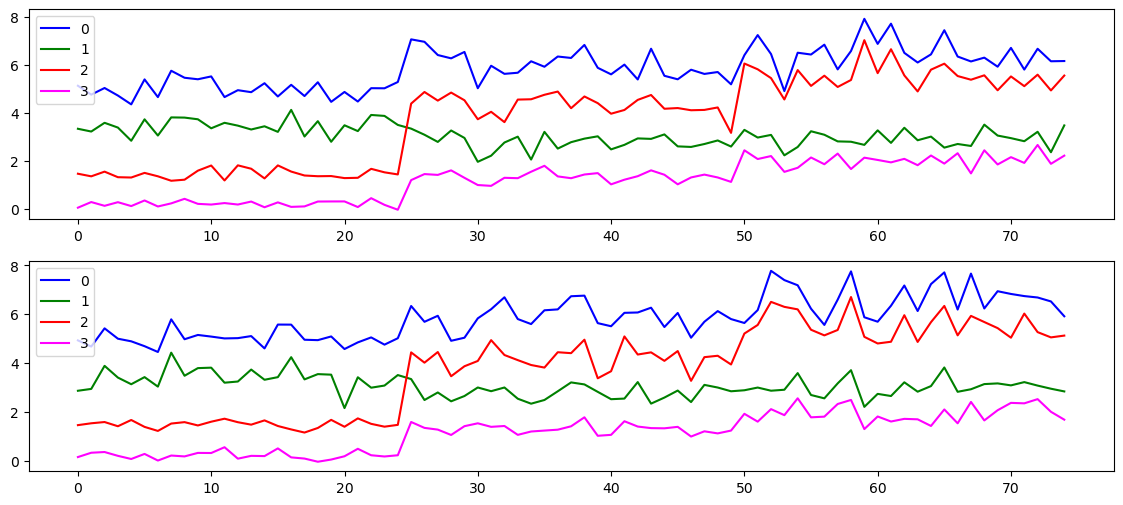

In [4]:
(X1,y1)= make_seq1(subset=1)
(X2,y2)= make_seq1(subset=2)
f,ax=plt.subplots(2,figsize=(14,6))
ax[0].plot(X1)
ax[1].plot(X2)
ax[0].legend(np.arange(4))
ax[1].legend(np.arange(4))
;

In [5]:
gModel1 = probdist.Gaussian()
gModel1.fit(X1, y1)
gModel1.print_model()

Means
[[5.00934443 3.47321651 1.46448969 0.22046013]
 [6.01044547 2.78748023 4.33241234 1.3418947 ]
 [6.50989732 2.94545958 5.55715841 2.05301121]]
Variance
[[0.12865191 0.10758383 0.03593024 0.01421749]
 [0.28787888 0.11800599 0.16858043 0.04054703]
 [0.38822388 0.10836605 0.27755525 0.07965517]]


### Gaussian Distributions
#### 1. Training
Train on Set 1 and Test on Set 2

In [6]:
gModel1 = probdist.Gaussian()
gModel1.__dict__

{'priors': None, 'var_smoothing': 1e-09}

In [7]:
# create some data
#
# train a Gaussian model from the training data
gModel1 = probdist.Gaussian()
gModel1.fit(X1, y1)
gModel1.print_model()

Means
[[5.00934443 3.47321651 1.46448969 0.22046013]
 [6.01044547 2.78748023 4.33241234 1.3418947 ]
 [6.50989732 2.94545958 5.55715841 2.05301121]]
Variance
[[0.12865191 0.10758383 0.03593024 0.01421749]
 [0.28787888 0.11800599 0.16858043 0.04054703]
 [0.38822388 0.10836605 0.27755525 0.07965517]]


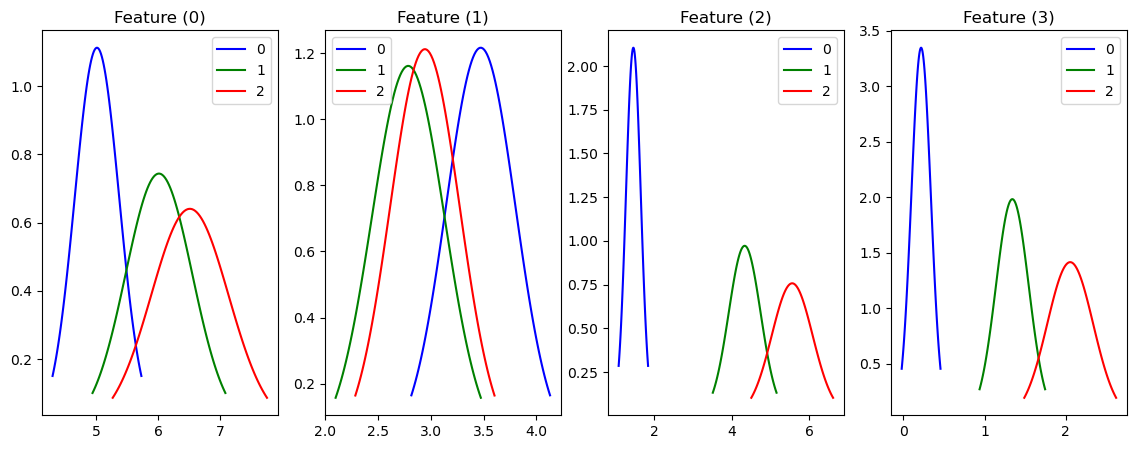

In [8]:
gModel1.plot_model()

In [9]:
gModel1.__dict__

{'priors': None,
 'var_smoothing': 1e-09,
 'classes_': array([0, 1, 2]),
 'n_features_in_': 4,
 'epsilon_': 3.1023464852358636e-09,
 'theta_': array([[5.00934443, 3.47321651, 1.46448969, 0.22046013],
        [6.01044547, 2.78748023, 4.33241234, 1.3418947 ],
        [6.50989732, 2.94545958, 5.55715841, 2.05301121]]),
 'var_': array([[0.12865191, 0.10758383, 0.03593024, 0.01421749],
        [0.28787888, 0.11800599, 0.16858043, 0.04054703],
        [0.38822388, 0.10836605, 0.27755525, 0.07965517]]),
 'class_count_': array([25., 25., 25.]),
 'class_prior_': array([0.33333333, 0.33333333, 0.33333333])}

In [10]:
mu = np.array([
    [5.5, 3.5, 3.,.5],
    [6., 2.75, 4., 1.5  ],
    [6.5, 3.0, 5., 2.]
])
gModel2 = probdist.Gaussian()
gModel2.init_model(mu=mu,class_prior=[.5,.2,.3])
#gModel2.var_ = np.ones((gModel2.theta_.shape))
#gModel2.n_features_in_ = 4
#gModel2.class_prior_ = np.ones(gModel2.n_classes)/gModel2.n_classes
gModel2.__dict__

{'priors': None,
 'var_smoothing': 1e-09,
 'n_classes': 3,
 'n_features_in_': 4,
 'theta_': array([[5.5 , 3.5 , 3.  , 0.5 ],
        [6.  , 2.75, 4.  , 1.5 ],
        [6.5 , 3.  , 5.  , 2.  ]]),
 'var_': array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]),
 'classes_': array([0, 1, 2]),
 'class_prior_': array([0.5, 0.2, 0.3])}

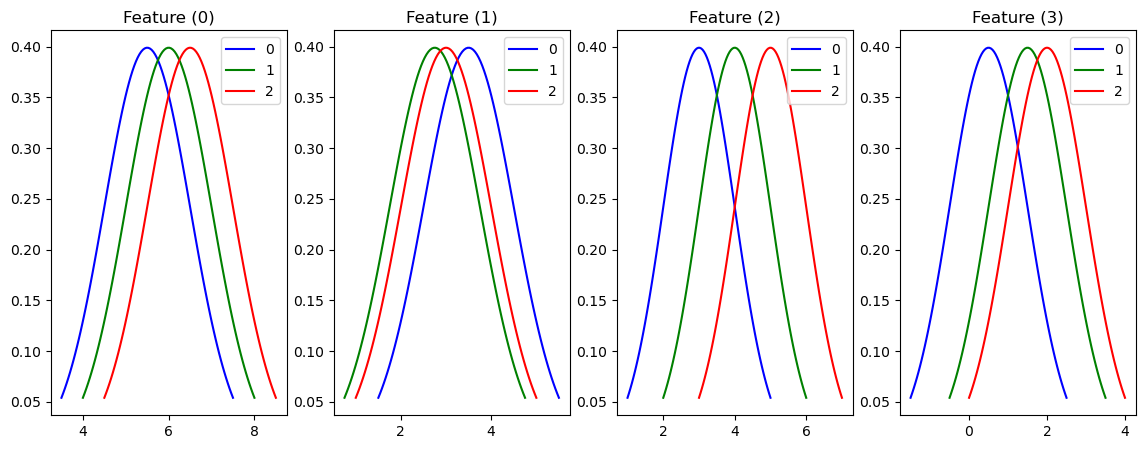

In [11]:
gModel2.plot_model()

### Posteriors and Log Posteriors

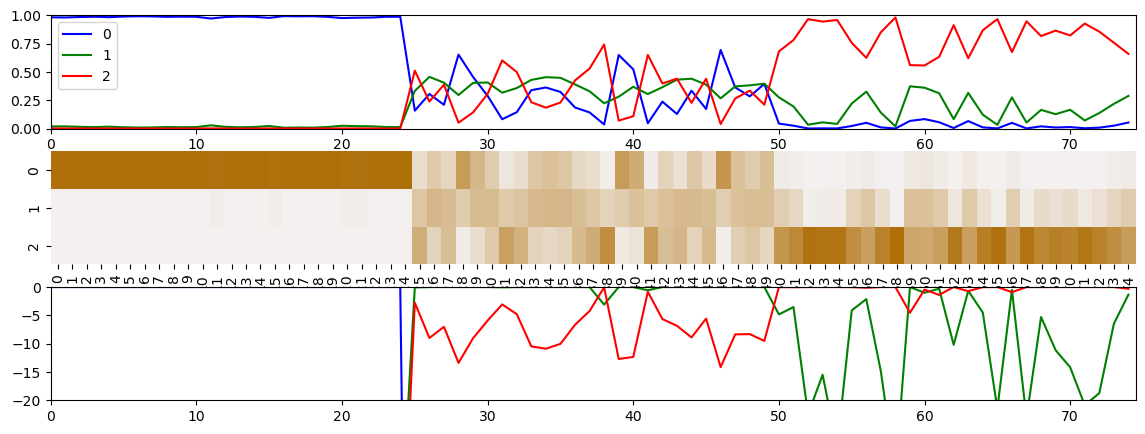

In [12]:
probs=gModel2.predict_proba(X2)
log_probs=gModel1.predict_log_proba(X2)
f,ax=plt.subplots(3,figsize=(14,5))
ax[0].plot(probs)
ax[0].set_xlim([0.,probs.shape[0]-.5])
ax[0].set_ylim([0,1.])
ax[0].legend(gModel1.classes_)
sns.heatmap(probs.T,ax=ax[1],vmax=1,vmin=0.0,yticklabels=gModel1.classes_,
            cmap=cmap,cbar=False, linewidth=0, linecolor='k')
ax[2].plot(log_probs)
ax[2].set_xlim([0.,probs.shape[0]-.5])
ax[2].set_ylim([-20,0.]);

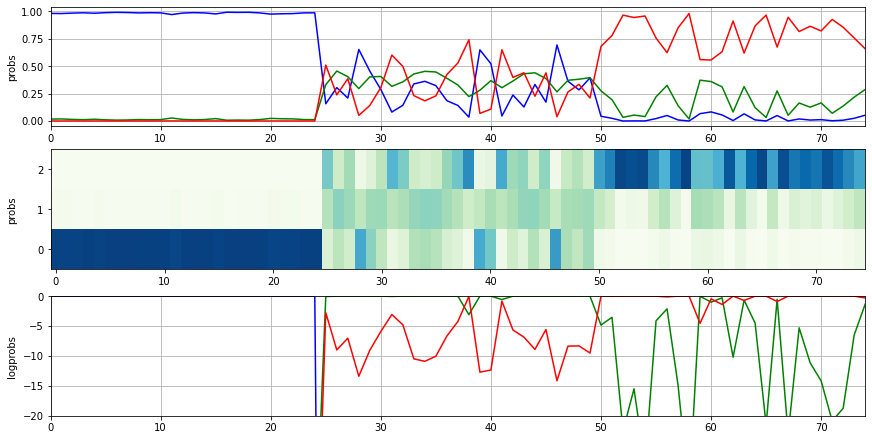

In [13]:
fig = Spd.SpchFig(row_heights=[1.,1.,1.])
fig.add_line_plot(probs.T,iax=0,ylabel='probs')
fig.add_img_plot(probs.T,iax=1,cmap='GnBu',ylabel='probs')
fig.add_line_plot(log_probs.T,iax=2,yrange=[-20.,0.],ylabel='logprobs')
display(fig)

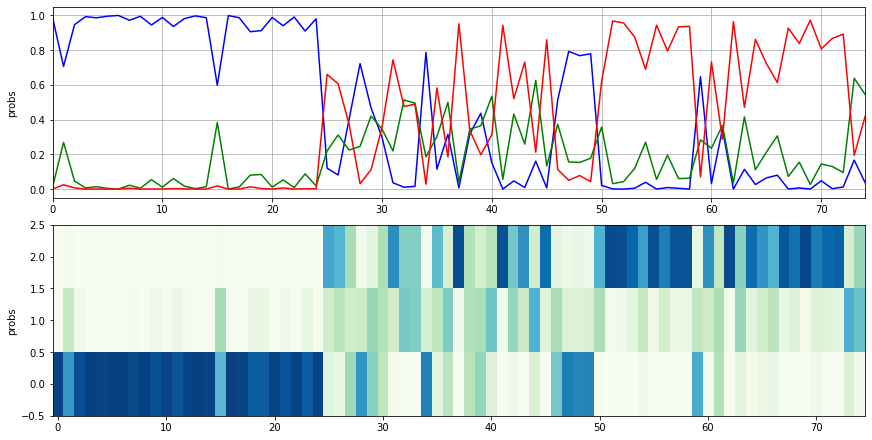

In [14]:
# let's make a bit harder by adding some noise to the test data
X3 = X2 + np.random.normal(loc=0.,scale=1,size=X2.shape)
probs=gModel2.predict_proba(X3)
log_probs=gModel1.predict_log_proba(X3)
fig = Spd.SpchFig(row_heights=[1.,1.])
fig.add_line_plot(probs.T,iax=0,ylabel='probs')
fig.add_img_plot(probs.T,iax=1,cmap='GnBu',ylabel='probs')
display(fig)

### Classification

In [15]:
y_pred = gModel2.predict(X2)
print("Test Set: Number of mislabeled points out of a total %d points : %d" % (X2.shape[0], (y2 != y_pred).sum()))
y_pred = gModel2.predict(X3)
print("Noisy Set: Number of mislabeled points out of a total %d points : %d" % (X3.shape[0], (y2 != y_pred).sum()))

Test Set: Number of mislabeled points out of a total 75 points : 15
Noisy Set: Number of mislabeled points out of a total 75 points : 23


## Discrete Densities aka Categorical NB

In [16]:
(X1d,y1) = make_seq1d(subset=1)
(X2d,y2) = make_seq1d(subset=2)
(X3d,y3) = make_seq1d(noise=1,subset=2)
#

In [17]:
X1d = X1d[:,0:2]
X2d = X2d[:,0:2]
X3d = X3d[:,0:2]

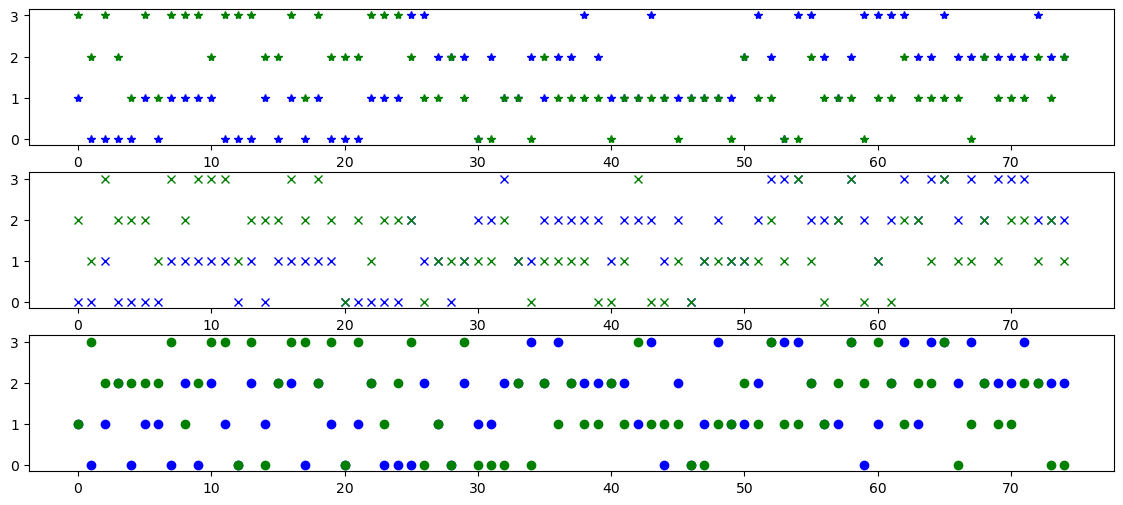

In [18]:
f,ax=plt.subplots(3,figsize=(14,6))
ax[0].plot(X1d,'*')
ax[1].plot(X2d,'x');
ax[2].plot(X3d,'o');

In [19]:
dd1 = Dist_Discr()
dd1.fit(X=X1d,y=y1)

Dist_Discr()

In [20]:
dd1._get_param_names()

['alpha', 'class_prior', 'fit_prior', 'min_categories']

In [21]:
dd1.get_params(), dd1.__dict__

({'alpha': 1.0,
  'class_prior': None,
  'fit_prior': True,
  'min_categories': None},
 {'alpha': 1.0,
  'fit_prior': True,
  'class_prior': None,
  'min_categories': None,
  'n_features_in_': 2,
  'classes_': array([0, 1, 2]),
  'class_count_': array([25., 25., 25.]),
  'category_count_': [array([[13., 12.,  0.,  0.],
          [ 1., 12.,  8.,  4.],
          [ 1.,  1., 14.,  9.]]),
   array([[ 0.,  3.,  8., 14.],
          [ 6., 16.,  3.,  0.],
          [ 4., 15.,  6.,  0.]])],
  'n_categories_': array([4, 4]),
  'feature_log_prob_': [array([[-0.7282385 , -0.80234647, -3.36729583, -3.36729583],
          [-2.67414865, -0.80234647, -1.17007125, -1.75785792],
          [-2.67414865, -2.67414865, -0.65924563, -1.06471074]]),
   array([[-3.36729583, -1.98100147, -1.17007125, -0.65924563],
          [-1.42138568, -0.53408249, -1.98100147, -3.36729583],
          [-1.75785792, -0.59470711, -1.42138568, -3.36729583]])],
  'class_log_prior_': array([-1.09861229, -1.09861229, -1.09861229])})

 ++ Feature(0) ++ 
[[0.48275862 0.44827586 0.03448276 0.03448276]
 [0.06896552 0.44827586 0.31034483 0.17241379]
 [0.06896552 0.06896552 0.51724138 0.34482759]]
 ++ Feature(1) ++ 
[[0.03448276 0.13793103 0.31034483 0.51724138]
 [0.24137931 0.5862069  0.13793103 0.03448276]
 [0.17241379 0.55172414 0.24137931 0.03448276]]


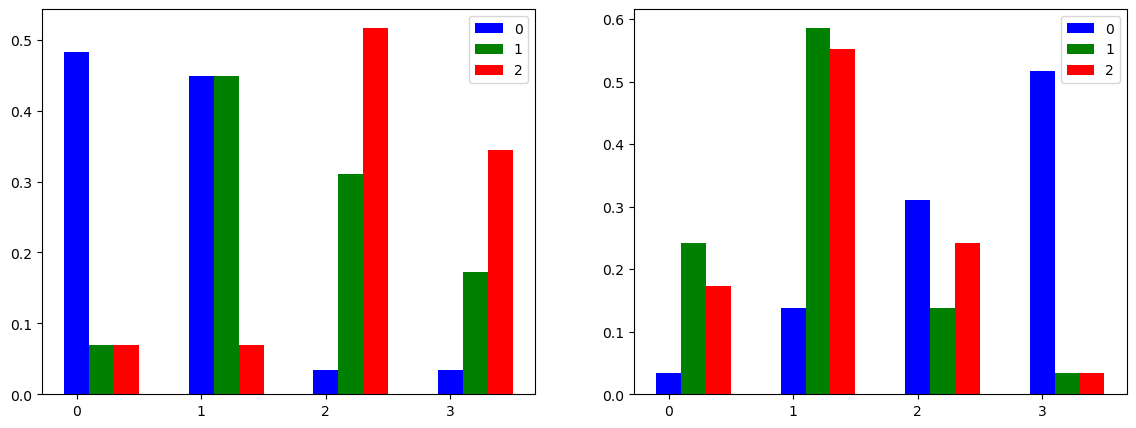

In [22]:
dd1.plot_model()
dd1.print_model()

In [23]:
dd1.get_class_proba(0)

[array([0.48275862, 0.44827586, 0.03448276, 0.03448276]),
 array([0.03448276, 0.13793103, 0.31034483, 0.51724138])]

In [24]:
dd1.print_model(per_class=True)

 ++ Class(0) ++ 
[0.48275862 0.44827586 0.03448276 0.03448276]
[0.03448276 0.13793103 0.31034483 0.51724138]
 ++ Class(1) ++ 
[0.06896552 0.44827586 0.31034483 0.17241379]
[0.24137931 0.5862069  0.13793103 0.03448276]
 ++ Class(2) ++ 
[0.06896552 0.06896552 0.51724138 0.34482759]
[0.17241379 0.55172414 0.24137931 0.03448276]


In [25]:
y_pred = dd1.predict(X2d)
print("Test Set: Number of mislabeled points out of a total %d points : %d" % (X2d.shape[0], (y2 != y_pred).sum()))
y_pred = dd1.predict(X3d)
print("Noisy Set: Number of mislabeled points out of a total %d points : %d" % (X3d.shape[0], (y2 != y_pred).sum()))

Test Set: Number of mislabeled points out of a total 75 points : 21
Noisy Set: Number of mislabeled points out of a total 75 points : 36


In [26]:
dd1.score(X3d,y3)

0.52

In [27]:
dd2 = probdist.Discrete(feature_probs=np.exp(dd1.feature_log_prob_))

In [28]:
dd2.__dict__

{'feature_prob_': array([[[0.48275862, 0.44827586, 0.03448276, 0.03448276],
         [0.06896552, 0.44827586, 0.31034483, 0.17241379],
         [0.06896552, 0.06896552, 0.51724138, 0.34482759]],
 
        [[0.03448276, 0.13793103, 0.31034483, 0.51724138],
         [0.24137931, 0.5862069 , 0.13793103, 0.03448276],
         [0.17241379, 0.55172414, 0.24137931, 0.03448276]]]),
 'alpha': 1.0,
 'class_prior_': None,
 'labels': None,
 'n_classes': 3,
 'n_features': 2,
 'n_categories': array([4, 4]),
 'classes_': array([0, 1, 2]),
 'priors': None}

++ Feature (0) ++
 


,0,1,2
P(0|.),0.482759,0.068966,0.068966
P(1|.),0.448276,0.448276,0.068966
P(2|.),0.034483,0.310345,0.517241
P(3|.),0.034483,0.172414,0.344828


++ Feature (1) ++
 


,0,1,2
P(0|.),0.034483,0.241379,0.172414
P(1|.),0.137931,0.586207,0.551724
P(2|.),0.310345,0.137931,0.241379
P(3|.),0.517241,0.034483,0.034483


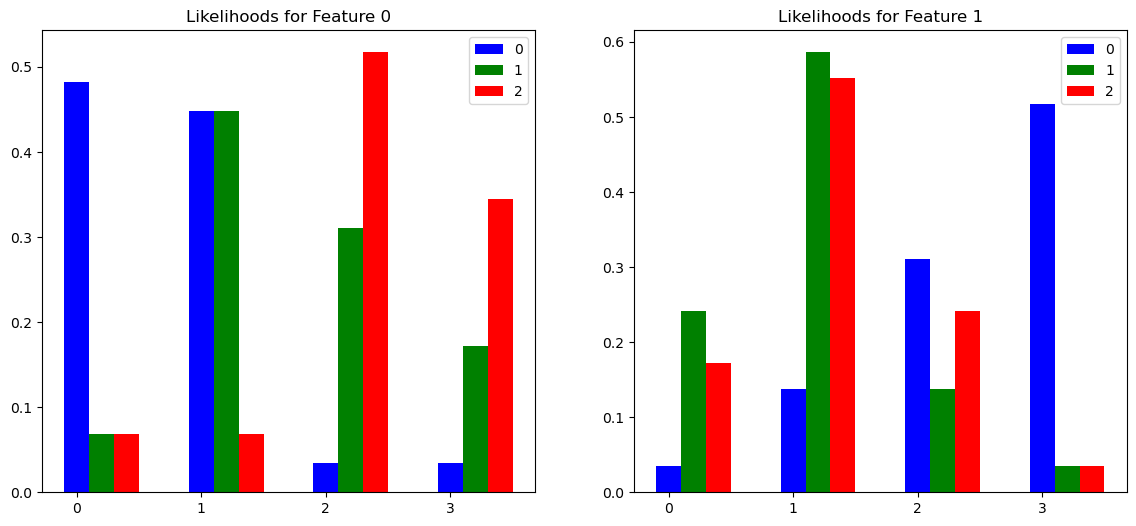

In [29]:
dd2.print_model()
dd2.plot_model()

In [31]:

dd3= probdist.Discrete(n_categories=[4,4])
dd3.fit(X=X1d,y=y1)
dd3.__dict__

sorry


{'feature_prob_': None,
 'alpha': 1.0,
 'class_prior_': None,
 'labels': None,
 'n_classes': 3,
 'n_categories': array([4, 4]),
 'n_features': 2,
 'classes_': None,
 'priors': None,
 'classes': array([0, 1, 2]),
 'feature_probs': [array([0.2       , 0.33333333, 0.29333333, 0.17333333]),
  array([0.13333333, 0.45333333, 0.22666667, 0.18666667])],
 'counts': [array([15, 25, 22, 13]), array([10, 34, 17, 14])]}

In [32]:
dd3.alpha=.2
dd3.__dict__

{'feature_prob_': None,
 'alpha': 0.2,
 'class_prior_': None,
 'labels': None,
 'n_classes': 3,
 'n_categories': array([4, 4]),
 'n_features': 2,
 'classes_': None,
 'priors': None,
 'classes': array([0, 1, 2]),
 'feature_probs': [array([0.2       , 0.33333333, 0.29333333, 0.17333333]),
  array([0.13333333, 0.45333333, 0.22666667, 0.18666667])],
 'counts': [array([15, 25, 22, 13]), array([10, 34, 17, 14])]}

In [33]:
X1d.shape

(75, 2)

In [ ]:
sns.heatmap(dd1.predict_proba(X3d).T,cmap='Greys',vmax=1.2)

### HMM Recognition

In [ ]:
from pyspch import libhmm 


dd1.print_model(per_class=True)


In [ ]:
imat = np.array([1.0, 0.0, 0.])
tmat = np.array([[.8,.2,0.],[0.,.8,.2],[0.,0.,1.]])

hmm1 = libhmm.HMM(n_states=3,prob_style="lin",obs_model=dd1,
                  transmat=tmat,initmat=imat)
hmm1.print_model()

In [ ]:
hmm1.obs_model.__dict__

In [ ]:
X=X2d
tr = libhmm.Trellis(hmm1)
tr.viterbi_pass(X2d)
tr.backtrace()

In [ ]:
tr.plot_trellis(plot_norm=True,plot_obs_probs=True,plot_values=False,vmin=0.,vmax=1,figsize=(15,5))

In [ ]:
# change the transition probability in State 2
hmm2 = copy.copy(hmm1)
hmm2.transmat =  np.array([[.8,.2,0.],[0.,.9,.1],[0.,0.,1.]])
tr2 = libhmm.Trellis(hmm2)
tr2.viterbi_pass(X2d)
tr2.backtrace()
tr2.plot_trellis(plot_norm=True,plot_obs_probs=True,plot_values=False,vmin=0.,vmax=1,figsize=(15,5))

In [ ]:
# change the transition probabilities to ergodic
hmm3 = copy.copy(hmm1)
hmm3.init_topology(type="ergodic")
#hmm3.transmat[2,2]=.5
#hmm3.transmat =  np.array([[.8,.2,0.],[0.,.9,.1],[0.,0.,1.]])
tr3 = libhmm.Trellis(hmm3)
tr3.viterbi_pass(X2d)
print(tr3.backtrace())
tr3.plot_trellis(plot_norm=True,plot_obs_probs=True,plot_values=False,vmin=0.,vmax=2,figsize=(15,3))